Al completar este laboratorio, serás capaz de:

Utilizar scikit-learn para implementar regresión lineal múltiple

Crear, entrenar y probar un modelo de regresión lineal múltiple con datos reales

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

Entender los Datos
Conjunto de datos: FuelConsumption.csv
Descargarás y utilizarás un conjunto de datos de consumo de combustible, FuelConsumption.csv, que contiene:

Información sobre la clasificación del consumo de combustible específico de cada modelo y las emisiones estimadas de dióxido de carbono para vehículos ligeros nuevos a la venta en Canadá.
Fuente del conjunto de datos

Variables/Columnas del dataset:
AÑO DEL MODELO (MODEL YEAR) - Ej: 2014

MARCA (MAKE) - Ej: VOLVO

MODELO (MODEL) - Ej: S60 AWD

CLASE DEL VEHÍCULO (VEHICLE CLASS) - Ej: COMPACTO

TAMAÑO DEL MOTOR (ENGINE SIZE) - Ej: 3.0 (litros)

CILINDROS (CYLINDERS) - Ej: 6

TRANSMISIÓN (TRANSMISSION) - Ej: AS6 (Automatic 6-speed)

TIPO DE COMBUSTIBLE (FUEL TYPE) - Ej: Z (Gasolina)

CONSUMO DE COMBUSTIBLE EN CIUDAD (L/100 km) - Ej: 13.2

CONSUMO DE COMBUSTIBLE EN CARRETERA (L/100 km) - Ej: 9.5

CONSUMO DE COMBUSTIBLE COMBINADO (L/100 km) - Ej: 11.5

CONSUMO DE COMBUSTIBLE COMBINADO (MPG) - Ej: 25

EMISIONES DE CO2 (g/km) - Ej: 182

Tu Tarea
Crear un modelo de regresión lineal múltiple utilizando algunas de estas características (features) para predecir las emisiones de CO2 de coches no observados, basándote en las características seleccionadas.

<h2 id="reading_data">Carga la información</h2>

In [4]:
df = pd.read_csv(url)
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
904,2014,PORSCHE,PANAMERA 4S EXECUTIVE,FULL-SIZE,3.0,6,AM7,Z,13.7,8.9,11.5,25,264
531,2014,INFINITI,Q60 CONVERTIBLE,SUBCOMPACT,3.7,6,AS7,Z,13.6,9.3,11.7,24,269
601,2014,KIA,FORTE,MID-SIZE,1.8,4,A6,X,9.6,6.6,8.3,34,191
607,2014,KIA,FORTE 5,FULL-SIZE,2.0,4,A6,X,9.7,6.8,8.4,34,193
188,2014,CHEVROLET,CAMARO,COMPACT,3.6,6,AS6,X,13.2,8.7,11.2,25,258


In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Tenga en cuenta que algunas variables no se incluyen en la descripción. Esto se debe a que no son numéricas. En la práctica, analizaría estas características si fuera necesario para mejorar la precisión de su modelo. Por razones de tiempo, puede omitir este paso.
Tenga en cuenta también que MODELYEAR es el mismo para todos los coches, por lo que puede omitir estas variables para esta ilustración de modelado.

In [6]:
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE',],axis=1)

Ahora que ha eliminado algunas características, observe las relaciones entre las características restantes.

Analizar una matriz de correlación que muestra las correlaciones por pares entre todas las características indica el nivel de independencia entre ellas.

También indica la capacidad predictiva de cada característica para predecir el objetivo.

Desea eliminar cualquier dependencia o correlación fuerte entre las características seleccionando la mejor de cada grupo correlacionado.

In [7]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


Mira la fila inferior, que muestra la correlación entre cada variable y el objetivo, 'CO2EMISSIONS'. Cada una de estas muestra un nivel de correlación bastante alto, superando cada una el 85% en magnitud. Por lo tanto, todas estas características son buenas candidatas.

A continuación, examina las correlaciones de los pares distintos. 'ENGINESIZE' y 'CYLINDERS' están altamente correlacionados, pero 'ENGINESIZE' está más correlacionado con el objetivo, por lo que podemos descartar 'CYLINDERS'.

De manera similar, cada una de las cuatro variables de economía de combustible está altamente correlacionada entre sí. Dado que FUELCONSUMPTION_COMB_MPG es la que más se correlaciona con el objetivo, puedes descartar las otras: 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'.

Observa que FUELCONSUMPTION_COMB y FUELCONSUMPTION_COMB_MPG no están perfectamente correlacionados. Sin embargo, deberían estarlo, porque miden la misma propiedad en diferentes unidades. En la práctica, investigarías por qué ocurre esto. Podrías descubrir que algunos o todos los datos no son utilizables tal como están.

In [8]:
df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [9]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


Para ayudar a seleccionar características predictivas que no sean redundantes, considere la siguiente matriz de dispersión, que muestra los diagramas de dispersión para cada par de características de entrada. La diagonal de la matriz muestra el histograma de cada característica.

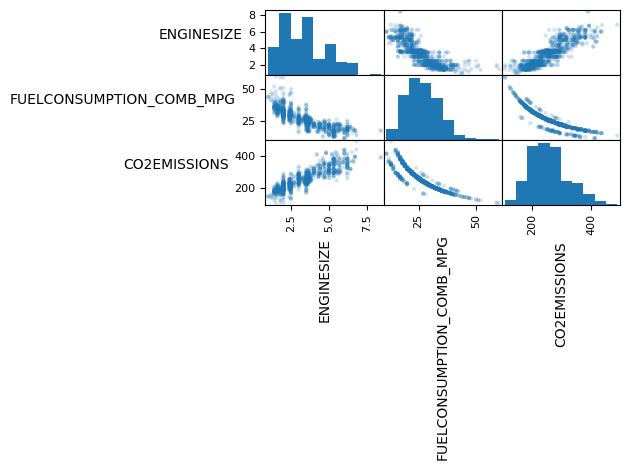

In [10]:
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
# need to rotate axis labels so we can read them
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

Como puedes ver, la relación entre 'FUELCONSUMPTION_COMB_MPG' y 'CO2EMISSIONS' no es lineal. Además, se pueden distinguir claramente tres curvas diferentes. Esto sugiere explorar las variables categóricas para ver si pueden explicar estas diferencias. Dejaremos esto como un ejercicio para que lo explores más a fondo. Con respecto a la no linealidad, la abordarás en el próximo laboratorio. Por ahora, solo consideremos mediante modelado si la economía de combustible explica parte de la variabilidad del objetivo tal como está.

Extrae las columnas necesarias y convierte los dataframes resultantes en arreglos de NumPy.

In [11]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

### Preprocesar caracteristicas estandarizadas
Debes estandarizar tus características de entrada para que el modelo no favorezca inadvertidamente a alguna característica debido a su magnitud.
La forma típica de hacerlo es restar la media y dividir entre la desviación estándar.
Scikit-learn puede hacer esto por ti.

In [12]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

En la práctica, si quieres evaluar correctamente tu modelo, definitivamente no debes aplicar este tipo de operaciones a todo el conjunto de datos, sino por separado al conjunto de entrenamiento y al de prueba.
Hay más aspectos importantes relacionados con esto. Profundizarás en este y otros errores comunes de evaluación más adelante en el curso.

In [13]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


Como puedes ver, una variable estandarizada tiene media cero y una desviación estándar de uno.

### Create train and test datasets

Divide aleatoriamente tus datos en conjuntos de entrenamiento y prueba, usando el 80% del conjunto de datos para entrenamiento y reservando el 20% restante para pruebas.

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

### Construir un modelo de regresión lineal múltiple

Los modelos de regresión lineal múltiple y simple pueden implementarse con exactamente las mismas herramientas de scikit-learn.

In [15]:
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model in the training data
regressor.fit(X_train, y_train)

# Print the coefficients
coef_ =  regressor.coef_
intercept_ = regressor.intercept_

print ('Coefficients: ',coef_)
print ('Intercept: ',intercept_)

Coefficients:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


Los parámetros Coefficients e Intercept definen el hiperplano de mejor ajuste para los datos. Dado que solo hay dos variables, y por lo tanto dos parámetros, el hiperplano es un plano. Sin embargo, este plano de mejor ajuste se verá diferente en el espacio original de características sin estandarizar.

Puedes transformar los parámetros de tu modelo de vuelta al espacio original previo a la estandarización de la siguiente manera. Esto te da una idea adecuada de lo que significan en términos de tus características de entrada originales. Sin estos ajustes, las salidas del modelo estarían ligadas a un espacio abstracto y transformado que no coincide con las variables independientes reales ni con el problema del mundo real que estás resolviendo.

In [16]:
# Get the standard scaler's mean and standard deviation parameters
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

# The least squares parameters can be calculated relative to the original, unstandardized feature space as:
coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


Esperarías que, en el caso límite en el que ENGINESIZE = 0 y FUELCONSUMPTION_COMB_MPG = 0, las emisiones de CO₂ resultantes también fueran cero. Esto es inconsistente con el hiperplano de “mejor ajuste”, que tiene una intersección distinta de cero, de 329 g/km.
La explicación debe ser que la variable objetivo no tiene una relación lineal muy fuerte con las variables dependientes y/o que los datos tienen valores atípicos (outliers) que están sesgando el resultado.

Los outliers pueden manejarse durante el preprocesamiento, o —como aprenderás más adelante en el curso— utilizando técnicas de regularización.
Una o más variables podrían tener una relación no lineal con el objetivo.
O puede que todavía exista cierta colinealidad entre las variables de entrada.

### Visualizar las salidas del modelo

Puedes visualizar qué tan bien se ajusta el modelo a los datos de entrenamiento trazando el plano ajustado sobre los datos.

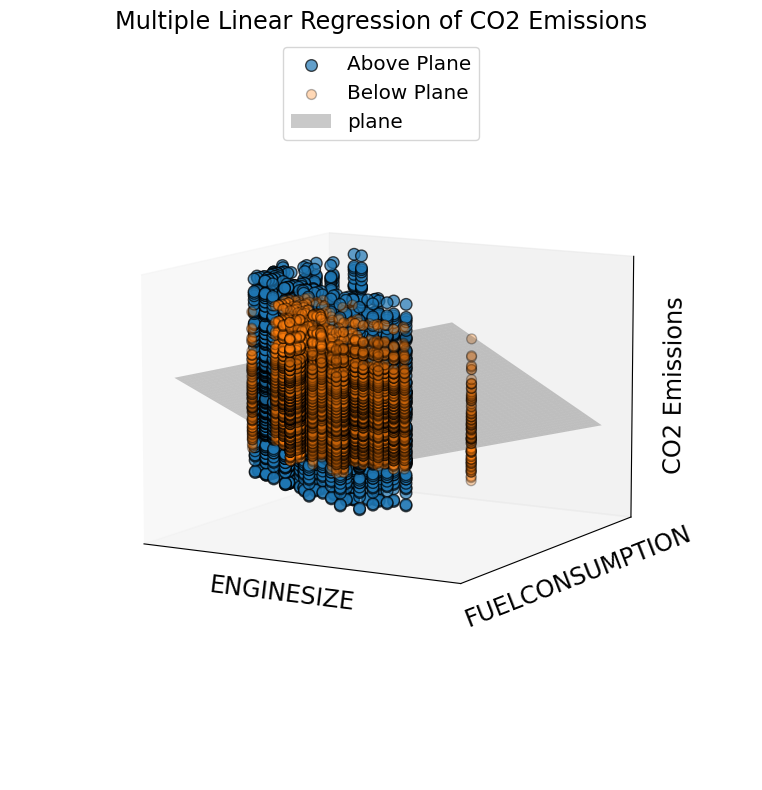

In [17]:
#from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

# Ensure X1, X2, and y_test have compatible shapes for 3D plotting
X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

# Create a mesh grid for plotting the regression plane
x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ +  coef_[0,0] * x1_surf  +  coef_[0,1] * x2_surf

# Predict y values using trained regression model to compare with actual y_test for above/below plane colors
y_pred = regressor.predict(X_test.reshape(-1, 1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

# Plotting
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points above and below the plane in different colors
ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane],  label="Above Plane",s=70,alpha=.7,ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane],  label="Below Plane",s=50,alpha=.3,ec='k')

# Plot the regression plane
ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21,label='plane')

# Set view and labels
ax.view_init(elev=10)

ax.legend(fontsize='x-large',loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')
plt.tight_layout()
plt.show()

En lugar de hacer una gráfica 3D, que es difícil de interpretar, puedes observar cortes verticales de la gráfica 3D trazando cada variable por separado como una línea de mejor ajuste usando los parámetros de regresión correspondientes.

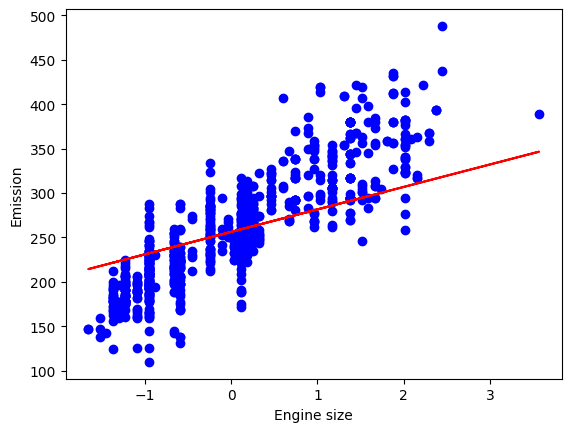

In [18]:
plt.scatter(X_train[:,0], y_train,  color='blue')
plt.plot(X_train[:,0], coef_[0,0] * X_train[:,0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

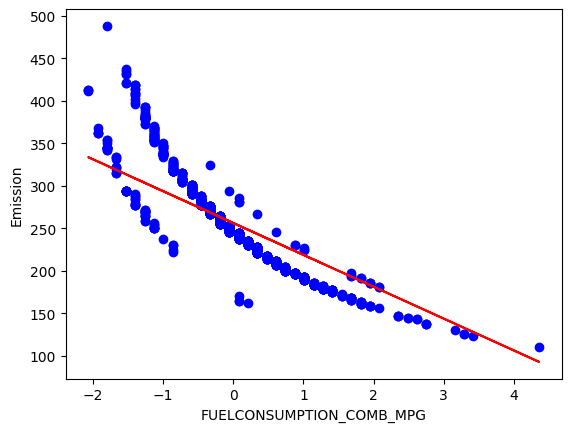

In [19]:
plt.scatter(X_train[:,1], y_train,  color='blue')
plt.plot(X_train[:,1], coef_[0,1] * X_train[:,1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

Evidentemente, la solución es increíblemente pobre porque el modelo está intentando ajustar un plano a una superficie que no es plana.

Determina e imprime los parámetros de la línea de regresión lineal de mejor ajuste para las emisiones de CO₂ con respecto al tamaño del motor.

In [20]:
X_train_1 = X_train[:,0]
regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1, 1), y_train)
coef_1 =  regressor_1.coef_
intercept_1 = regressor_1.intercept_
print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


Genera un diagrama de dispersión (scatterplot) de las emisiones de CO₂ contra ENGINESIZE e incluye la línea de regresión de mejor ajuste para los datos de entrenamiento.

Text(0, 0.5, 'Emission')

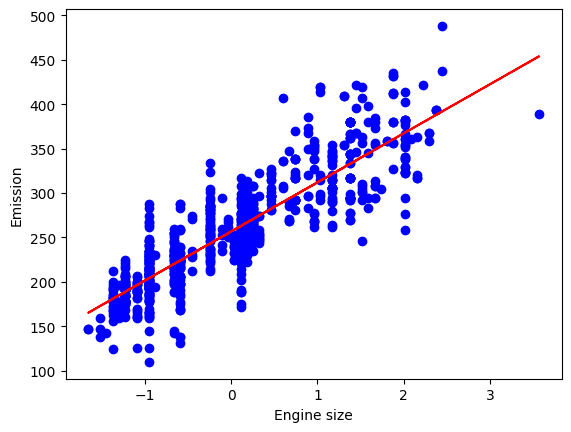

In [21]:
plt.scatter(X_train_1, y_train,  color='blue')
plt.plot(X_train_1, coef_1[0] * X_train_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Evidentemente, este modelo de regresión lineal simple proporciona un ajuste mucho mejor de las emisiones de CO₂ en los datos de entrenamiento que el modelo de regresión múltiple. Veamos cuál es su rendimiento en los datos de prueba.

Genera el mismo diagrama de dispersión y la línea de regresión de mejor ajuste, pero ahora basando el resultado en el conjunto de datos de prueba. Considera cómo el resultado de prueba se compara con el resultado de entrenamiento.

Text(0, 0.5, 'CO2 Emission')

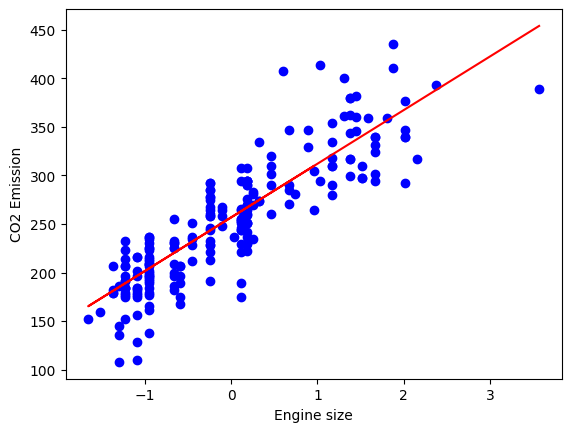

In [22]:
X_test_1 = X_test[:,0]
plt.scatter(X_test_1, y_test,  color='blue')
plt.plot(X_test_1, coef_1[0] * X_test_1 + intercept_1, '-r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")

Repite el mismo modelado, pero usando FUELCONSUMPTION_COMB_MPG como la variable independiente. Muestra los coeficientes del modelo, incluyendo la intersección (intercept).

In [23]:
X_train_2 = X_train[:,1]
regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1, 1), y_train)
coef_2 =  regressor_2.coef_
intercept_2 = regressor_2.intercept_
print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  [[-58.51827989]]
Intercept:  [256.09392179]


Repite el mismo modelado, pero usa FUELCONSUMPTION_COMB_MPG como la variable independiente. Muestra los coeficientes del modelo, incluyendo la intersección (intercept).

Text(0, 0.5, 'CO2 Emission')

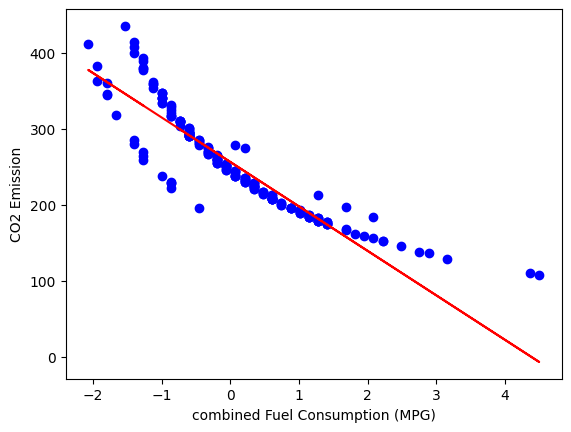

In [24]:
X_test_2 = X_test[:,1]
plt.scatter(X_test_2, y_test,  color='blue')
plt.plot(X_test_2, coef_2[0] * X_test_2 + intercept_2, '-r')
plt.xlabel("combined Fuel Consumption (MPG)")
plt.ylabel("CO2 Emission")

### Fin del cuadernillo